# <center>Biodiversity in National Parks<center> #

The goal of this project is to analyze how biodiversity has developed in various national parks in the United States. The two main components analyzed are species found in the parks and the actual location of those parks. In this regard, some of the main questions for analysis are as follows: 

1. What is the distribution of conservation status for species?
2. Are certain types of species more likely to be endangered?
3. Are the differences between species and their conservation status significant?
4. Which animal is most prevalent and what is their distribution amongst parks?

#### <center>Data sources:<center> ####

Both Observations.csv and Species_info.csv was provided by Codecademy.com.

#### <center>Importing the Data<center> ####

In [2]:
# Import relevant Python modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from itertools import chain
import string

In [238]:
# Import relevant datasets
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [239]:
# Assess data from observations dataset
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [240]:
observations.count()

scientific_name    23296
park_name          23296
observations       23296
dtype: int64

In [241]:
# Assess data from species dataset
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [242]:
species.count()

category               5824
scientific_name        5824
common_names           5824
conservation_status     191
dtype: int64

In [243]:
# Perform an initial analysis of data from observations dataset
observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [244]:
# Perform an initial analysis of data from species dataset
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


## <center>Assessing Missing Data<center> ##

In this section, we want to determine to what extent data may be misleading, missing, corrupted or unreliable.

In [245]:
# Determine missing values in observations dataset
for column in observations:
    maxRows = observations[column].count()
    print('Percentage of Missing Data: ')
    print((1 - observations.count() / maxRows) * 100)

Percentage of Missing Data: 
scientific_name    0.0
park_name          0.0
observations       0.0
dtype: float64
Percentage of Missing Data: 
scientific_name    0.0
park_name          0.0
observations       0.0
dtype: float64
Percentage of Missing Data: 
scientific_name    0.0
park_name          0.0
observations       0.0
dtype: float64


In [246]:
# Determine missing values in species dataset
for column in species:
    maxRows = species[column].count()
    print('Percentage of Missing Data: ')
    print((1 - species.count() / maxRows) * 100)

Percentage of Missing Data: 
category                0.000000
scientific_name         0.000000
common_names            0.000000
conservation_status    96.720467
dtype: float64
Percentage of Missing Data: 
category                0.000000
scientific_name         0.000000
common_names            0.000000
conservation_status    96.720467
dtype: float64
Percentage of Missing Data: 
category                0.000000
scientific_name         0.000000
common_names            0.000000
conservation_status    96.720467
dtype: float64
Percentage of Missing Data: 
category              -2949.21466
scientific_name       -2949.21466
common_names          -2949.21466
conservation_status       0.00000
dtype: float64


In [247]:
# Determine the shape of the observations dataset
print(f'Observations Shape: {observations.shape}')

Observations Shape: (23296, 3)


In [248]:
# Determine the shape of the species dataset
species.shape
print(f'Species Shape: {species.shape}')

Species Shape: (5824, 4)


## <center>Exploring the Data<center> ##

In this section, we want to address the different dynamics that exist in each respective dataset, especially regarding the composition of values in the Series of each dataset

#### Observations Dataset ####

In [249]:
# Get the column names for this dataset
observations.columns

Index(['scientific_name', 'park_name', 'observations'], dtype='object')

In [250]:
# Check how many parks exist in this dataset and their labels
print(f'The number of parks are {observations.park_name.nunique()}')
print(f'The names of the parks are as follows: {observations.park_name.unique()}')

The number of parks are 4
The names of the parks are as follows: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [251]:
# Check the number of observations:
print(f'The number of observations is {observations.observations.sum()}')

The number of observations is 3314739


#### Species Dataset ####

In [252]:
# Get the column names for this dataset
species.columns

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

In [253]:
# Determine the number of unique species:
print(f'The number of unique species is {species.scientific_name.nunique()}')

The number of unique species is 5541


In [254]:
# Determine the number and type of categories
print(f'The number of categories is {species.category.nunique()}')
print(f'The types of species are as follows: {species.category.unique()}')

The number of categories is 7
The types of species are as follows: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [255]:
# Outline the distribution of categories:
print(species.groupby('category').size())

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


In [256]:
# Determine the number and type of conservation_status:
print(f'The number of conservation statuses are {species.conservation_status.nunique()}')
print(f'The type of conservation statuses are {species.conservation_status.unique()}')

The number of conservation statuses are 4
The type of conservation statuses are [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [257]:
# Determine the size and distribution of conservation_status:
print(f'The number of nan values is {species.conservation_status.isna().sum()}')
print(f'The distribution of conservation status is as follows: {species.groupby('conservation_status').size()}')

The number of nan values is 5633
The distribution of conservation status is as follows: conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


## <center>Peforming an Analysis of the Dataset<center> ##
In this section, we want to determine what the relevant information we can gleam from the data is, particularly in reference to our main research questions.

In [258]:
# Fill in the missing data from the species dataset with "No Invervention"
species.fillna('No Intervention', inplace=True)
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

In [259]:
# Break down the conservation status by categories to determine distribution of values
conservationCategory = species[species.conservation_status != 'No Intervention']\
    .groupby(['conservation_status', 'category'])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0.5, 1.0, 'Breakdown of Conservation Status by Category of Animal')

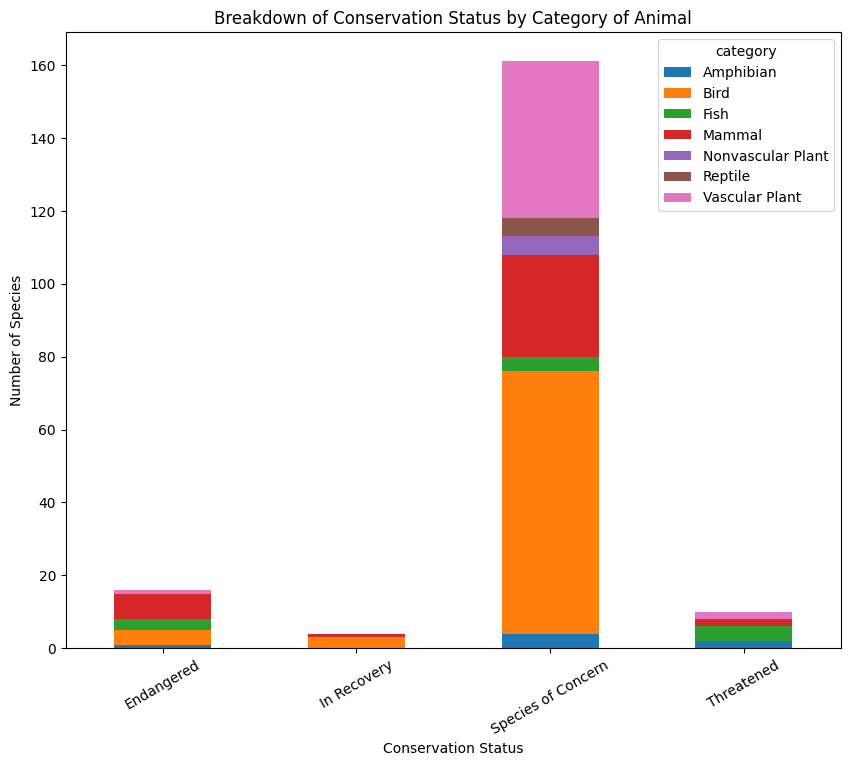

In [260]:
# Create a bar graph to show the distribution of conservation status by category of animal
ax = conservationCategory.plot(kind='bar', figsize=(10,8), stacked=True)

ax.set_xlabel('Conservation Status')
ax.set_xticklabels(['Endangered', 'In Recovery', 'Species of Concern', 'Threatened'], rotation=30)
ax.set_ylabel('Number of Species')
ax.set_title('Breakdown of Conservation Status by Category of Animal')

#### In Conservation ###

We want to determine whether certain types of species are more likely to be endangered than others.

In [261]:
# Eliminate the 'No Intervention' category:
species['is_protected'] = species.conservation_status != 'No Intervention'

In [262]:
# Group by "Category" and "Is_Protected" to show break down of each species and their protected status
category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index().pivot(columns='is_protected',
                                                                                                           index='category',
                                                                                                           values='scientific_name').reset_index()

category_counts.columns = ['category', 'not_protected', 'protected']
category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [263]:
# From here, we want to determine the percentage of each species that is protected
category_counts['percent_protected'] = category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


## <center>Statistical Significance<center> ##

In this section, we want to be sure to calculate the level of significance of the data we have processed. Specifically, we want to know the differences between species and their conservation status significance, as well as which animal is most prevalent in terms of protection. We first want to start by running chi2 tests on different groups of animals. It will be listed as follows:

* Mammals v. Birds (contingency1)
* Reptiles v. Mammals (contingency2)
* Mammals v. Vascular Plants (contingency3)
* Vasular Plants v. Birds (contingency4)
* Fish v. Reptiles (contingency5)
* Fish v. Mammals (contingency6)
* Birds v. Fish (contingency7)
* Vasuclar Plants v. Nonvascular Plants (contingency8)

If the p-value for a test is below 5%, that indicates a significant threshold.

In [264]:
# For the first chi2 test, we want to compare mammals v. birds
contingency1 = [[30, 146],
                 [75, 413]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=np.float64(0.1617014831654557), pvalue=np.float64(0.6875948096661336), dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

In [265]:
# For the second chi2 test, we want to compare reptiles v. mammals
contingency2 = [[5, 73],
                [30, 146]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=np.float64(4.289183096203645), pvalue=np.float64(0.038355590229699), dof=1, expected_freq=array([[ 10.7480315,  67.2519685],
       [ 24.2519685, 151.7480315]]))

In [266]:
# For the third chi2 test, we want to compare mammals v. vascular plants:
contingency3 = [[30, 146],
                [46, 4216]]
chi2_contingency(contingency3)

Chi2ContingencyResult(statistic=np.float64(246.5870424874456), pvalue=np.float64(1.4405067309854043e-55), dof=1, expected_freq=array([[3.01397026e+00, 1.72986030e+02],
       [7.29860297e+01, 4.18901397e+03]]))

In [267]:
# For the fourth chi2 test, we want to compare vasular plants v. birds
contingency4 = [[46, 4216],
                [75, 413]]
chi2_contingency(contingency4)

Chi2ContingencyResult(statistic=np.float64(354.42332680820607), pvalue=np.float64(4.612268031690143e-79), dof=1, expected_freq=array([[ 108.56884211, 4153.43115789],
       [  12.43115789,  475.56884211]]))

In [268]:
# For the fifth chi2 test, we want to compare fish v. reptiles:
contingency5 = [[11, 115],
               [5, 73]]
chi2_contingency(contingency5)

Chi2ContingencyResult(statistic=np.float64(0.10955400981996731), pvalue=np.float64(0.7406524615907095), dof=1, expected_freq=array([[  9.88235294, 116.11764706],
       [  6.11764706,  71.88235294]]))

In [269]:
# For the sixth chi2 test, we want to compare fish v. mammals:
contingency6 = [[11, 115],
                [30, 146]]
chi2_contingency(contingency6)

Chi2ContingencyResult(statistic=np.float64(3.6476510249814145), pvalue=np.float64(0.056148348448900154), dof=1, expected_freq=array([[ 17.10596026, 108.89403974],
       [ 23.89403974, 152.10596026]]))

In [270]:
# For the seventh chi2 test, we want to compare birds v. fish:
contingency7 = [[75, 413],
                [11, 115]]
chi2_contingency(contingency7)

Chi2ContingencyResult(statistic=np.float64(3.1338596463736463), pvalue=np.float64(0.0766819956905718), dof=1, expected_freq=array([[ 68.35179153, 419.64820847],
       [ 17.64820847, 108.35179153]]))

In [271]:
# For the eigth chi2 test, we want to compare vascular plants v. nonvascular plants:
contingency8 = [[46, 4216],
                [5, 328]]
chi2_contingency(contingency8)

Chi2ContingencyResult(statistic=np.float64(0.1906912123381206), pvalue=np.float64(0.6623419491381985), dof=1, expected_freq=array([[4.73040261e+01, 4.21469597e+03],
       [3.69597388e+00, 3.29304026e+02]]))

#### Chi2 Results ####

For this assessment, it was found that only one grouping met threshold for statistical significance (reptiles v. mammals). However, there were some groupings that came very close to meeting the threshold for statistical significance, measured by a p-value of 0.05 or less: (a) fish v. mammals and (b) birds v. fish. 

In [272]:
pval_data = np.array([['Mammals v. Birds', 'Reptiles v. Mammals', 'Mammals v. Vascular Plants', 'Vasuclar Plants v. Birds', 'Fish v. Reptiles', 'Fish v. Mammals', 'Birds v. Fish', 'Vascular Plants v. Birds'], 
                             [0.688, 0.038, 1.441, 4.612, 0.741, 0.056, 0.077, 4.612]])
pval_data_transposed = pval_data.T
comparative_pval = pd.DataFrame(pval_data_transposed, columns=['Pairings', 'Statistical Significance (p-value)'])
comparative_pval = comparative_pval.set_index('Pairings')
comparative_pval[:6]

,Statistical Significance (p-value)
Pairings,
Mammals v. Birds,0.688
Reptiles v. Mammals,0.038
Mammals v. Vascular Plants,1.441
Vasuclar Plants v. Birds,4.612
Fish v. Reptiles,0.741
Fish v. Mammals,0.056


### <center>Species in Parks<center> ###

Along with the aforementioned analysis and the breakdown of categories, we also want to look at teh common names of 'species' to comprehend the most prevalent animals in each dataset. To accomplish this, we must split the data up into individual names. 

In [273]:
# First we want to make a function to remove puncuation from the names of animals:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

## <center>Distribution of Animals by Species<center> ##

In this sub-section, we create one list of unique species by category. We then break down the distribution of bats by their 'protected' or 'unprotected' status depending on the national park. The assessment, as well as most observed species in each category, develops as follows:

1. Mammals (Bats)
2. Amphibians (Salamanders)
3. Birds (Warblers)
4. Fish (Shiner)
5. Nonvascular Plants (Moss)
6. Reptiles (Snakes)
7. Vasular Plants (Sedge)

### <center>Mammals<center> ###

In this sub-section, we create one list of unique mammals. We then break down the distribution of bats by their 'protected' or 'unprotected' status depending on the national park. 

In [274]:
# Perform remove_punctuation function:
common_names_mammals = species[species.category == 'Mammal']\
                .common_names\
                .apply(remove_punctuation)\
                .str.split().tolist()

common_names_mammals[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [275]:
# Remove duplicated items from list of mammals:
cleanRows_mammals = []

for item in common_names_mammals:
    item = list(dict.fromkeys(item))
    cleanRows_mammals.append(item)

cleanRows_mammals[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [276]:
# How It Works:
#     + dict.fromkeys(item) creates a dictionary where the keys are the unique elements from item, effectively removing duplicates because dictionary keys must be unique.
#     + list(...) then converts these keys back into a list, so the duplicates are removed but the original order of appearance is preserved.
#     + The processed item (now with duplicates removed) is appended to the cleanRows list.
#     + This slice operation displays the first six elements of the cleanRows list, allowing you to inspect the first few processed lists.

In [277]:
# Make one list from all created values:
list_mammals = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows_mammals))
list_mammals[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

In [278]:
# How this last code operates
# 1. Understanding the chain.from_iterable() Method:
#     + chain.from_iterable() is a function from Python's itertools module.
#     + Its purpose is to flatten a list of lists (or any iterable of iterables) into a single list.
#     + For example, if you have [[1, 2], [3, 4], [5]], chain.from_iterable() will combine them into [1, 2, 3, 4, 5].
# 2. The Generator Expression:
#     + This is a generator expression that iterates over each element i in cleanRows.
#     + isinstance(i, list) checks if i is a list:
#        + If i is a list, it leaves i unchanged (i if isinstance(i, list)).
#        + If i is not a list (e.g., a single item), it wraps i in a list (else [i]).
#     + The generator produces an iterable of lists, whether i was initially a list or a single item wrapped in a list.
# 3. Applying chain.from_iterable() to Flatten the List:
#     + chain.from_iterable(...) flattens the generator expression's output. If cleanRows contains sublists and individual items, this step will produce a single flat list with all elements.
# 4. Converting the Result into a List:
#     + The flattened result is converted into a list and assigned to the variable res.

In [279]:
# Count the number of occurences for each of the mammal names:
wordsCounted_mammals = []

for i in list_mammals:
    x = list_mammals.count(i)
    wordsCounted_mammals.append((i, x))

mammal_count = pd.DataFrame(set(wordsCounted_mammals), columns = ['Word', 'Count']).sort_values('Count', ascending = False)
mammal_count[:10]

,Word,Count
33,Bat,23
85,Shrew,18
26,Myotis,17
94,Mouse,16
95,Chipmunk,13
47,Squirrel,12
35,American,12
3,Eastern,11
188,Vole,11
14,Mountain,10


### Bats ###

In [280]:
# There are several types of 'bats', so we first want to determine which species refer to 'bats':
# Create column of booleans to check if 'is_bat' is True:
species['is_bat'] = species.common_names.str.contains(r'\bBat\b', regex=True)

# Check column in 'species' dataset to make sure it worked:
species[:5]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False


In [281]:
# Count values where 'is_bat' is True:
species[species.is_bat][:10]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


In [282]:
# Merge results with 'observations' dataset to make new DataFrame:
bat_observations = observations.merge(species[species.is_bat])

# Ensure it worked:
bat_observations[:5]

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
2,Nycticeius humeralis,Yellowstone National Park,219,Mammal,Evening Bat,No Intervention,False,True
3,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
4,Lasiurus borealis,Yosemite National Park,134,Mammal,"Eastern Red Bat, Red Bat",No Intervention,False,True


In [283]:
# Check total bats observations in each national park over previous 7 days:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [284]:
# Check which observations were protected and unprotected, by park:
obs_bypark_bats = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_bypark_bats

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


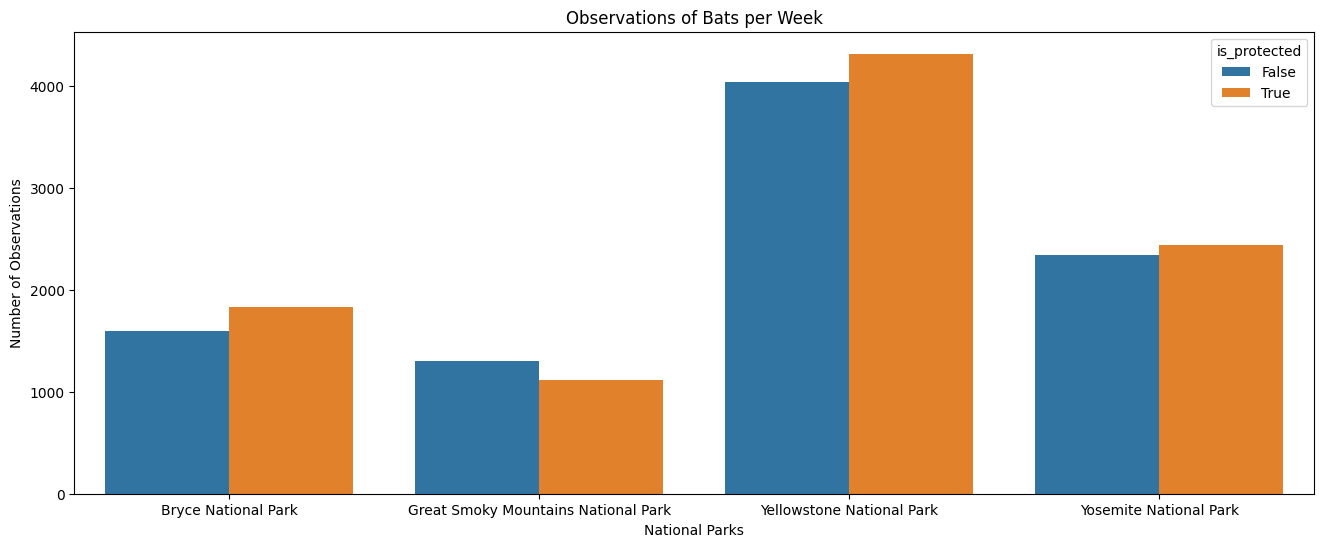

<Figure size 640x480 with 0 Axes>

In [285]:
# Plot this data to create visual demonstration (comparative bar graph):
plt.figure(figsize=(16, 6))
sns.barplot(x=obs_bypark_bats.park_name, y=obs_bypark_bats.observations, hue=obs_bypark_bats.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()
plt.clf()

## <center>Amphibians<center> ##

In this sub-section, we create one list of unique amphibians. We then break down the distribution of salamanders by their 'protected' or 'unprotected' status depending on the national park. 

In [286]:
# Perform remove_punctuation function:
common_names_amphibians = species[species.category == 'Amphibian']\
                .common_names\
                .apply(remove_punctuation)\
                .str.split().tolist()

common_names_amphibians[:6]

[['Eastern', 'American', 'Toad'],
 ['Fowlers', 'Toad', 'Woodhouses', 'Toad'],
 ['Northern', 'Cricket', 'Frog'],
 ['Copes', 'Gray', 'Treefrog'],
 ['Gray', 'Treefrog'],
 ['Mountain', 'Chorus', 'Frog']]

In [287]:
# Remove duplicated items from list of amphibians:
cleanRows_amphibians = []

for item in common_names_amphibians:
    item = list(dict.fromkeys(item))
    cleanRows_amphibians.append(item)

cleanRows_amphibians[:6]

[['Eastern', 'American', 'Toad'],
 ['Fowlers', 'Toad', 'Woodhouses'],
 ['Northern', 'Cricket', 'Frog'],
 ['Copes', 'Gray', 'Treefrog'],
 ['Gray', 'Treefrog'],
 ['Mountain', 'Chorus', 'Frog']]

In [288]:
# Make one list from all created values:
list_amphibians = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows_amphibians))
list_amphibians[:6]

['Eastern', 'American', 'Toad', 'Fowlers', 'Toad', 'Woodhouses']

In [289]:
# Count the number of occurences for each of the amphibian names:
wordsCounted_amphibians = []

for i in list_amphibians:
    x = list_amphibians.count(i)
    wordsCounted_amphibians.append((i,x))

amphibian_count = pd.DataFrame(set(wordsCounted_amphibians), columns = ['Word', 'Count']).sort_values('Count', ascending = False)
amphibian_count[:10]

,Word,Count
67,Salamander,41
84,Frog,14
5,Northern,8
61,Eastern,7
22,Toad,7
40,Southern,6
20,Chorus,5
56,Mud,4
52,Red,4
15,American,3


### Salamanders ###

In [290]:
# There are several types of 'salamanders', so we first want to determine which species refer to 'salamanders':
# Create column of booleans to check if 'is_sal' is True:
species['is_sal'] = species.common_names.str.contains(r'\bSalamander\b', regex=True)

# Check column in 'species' dataset to make sure it worked:
species[:5]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sal
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False,False


In [291]:
# Count values where 'is_sal' is True:
species[species.is_sal][:10]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sal
428,Amphibian,Ambystoma maculatum,Spotted Salamander,No Intervention,False,False,True
429,Amphibian,Ambystoma opacum,Marbled Salamander,No Intervention,False,False,True
430,Amphibian,Ambystoma talpoideum,Mole Salamander,No Intervention,False,False,True
432,Amphibian,Desmognathus conanti,Spotted Dusky Salamander,No Intervention,False,False,True
433,Amphibian,Desmognathus imitator,Imitator Salamander,No Intervention,False,False,True
434,Amphibian,Desmognathus marmoratus,Shovel-Nosed Salamander,No Intervention,False,False,True
435,Amphibian,Desmognathus monticola,Seal Salamander,No Intervention,False,False,True
436,Amphibian,Desmognathus ocoee,Ocoee Salamander,No Intervention,False,False,True
437,Amphibian,Desmognathus quadramaculatus,Black-Bellied Salamander,No Intervention,False,False,True
438,Amphibian,Desmognathus santeetlah,"Santeetlah Dusky Salamander, Santleetlah Dusky...",No Intervention,False,False,True


In [292]:
# Merge results with 'observations' dataset to make new DataFrame:
sal_observations = observations.merge(species[species.is_sal])

# Ensure it worked:
sal_observations[:6]

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat,is_sal
0,Eurycea longicauda longicauda,Yosemite National Park,147,Amphibian,Longtail Salamander,No Intervention,False,False,True
1,Desmognathus wrighti,Yellowstone National Park,201,Amphibian,Pigmy Salamander,Species of Concern,True,False,True
2,Plethodon aureolus,Bryce National Park,90,Amphibian,Tellico Salamander,No Intervention,False,False,True
3,Plethodon metcalfi,Bryce National Park,131,Amphibian,Southern Gray-Cheeked Salamander,No Intervention,False,False,True
4,Ambystoma mavortium melanostictum,Bryce National Park,84,Amphibian,Blotched Tiger Salamander,No Intervention,False,False,True
5,Ambystoma mavortium melanostictum,Yellowstone National Park,287,Amphibian,Blotched Tiger Salamander,No Intervention,False,False,True


In [293]:
# Check total salamander observations in each national park over previous 7 days:
sal_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3946
1,Great Smoky Mountains National Park,3023
2,Yellowstone National Park,10234
3,Yosemite National Park,6174


In [294]:
# Check which observations were protected and unprotected, by park:
obs_bypark_sal = sal_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_bypark_sal

,park_name,is_protected,observations
0,Bryce National Park,False,3723
1,Bryce National Park,True,223
2,Great Smoky Mountains National Park,False,2863
3,Great Smoky Mountains National Park,True,160
4,Yellowstone National Park,False,9844
5,Yellowstone National Park,True,390
6,Yosemite National Park,False,5885
7,Yosemite National Park,True,289


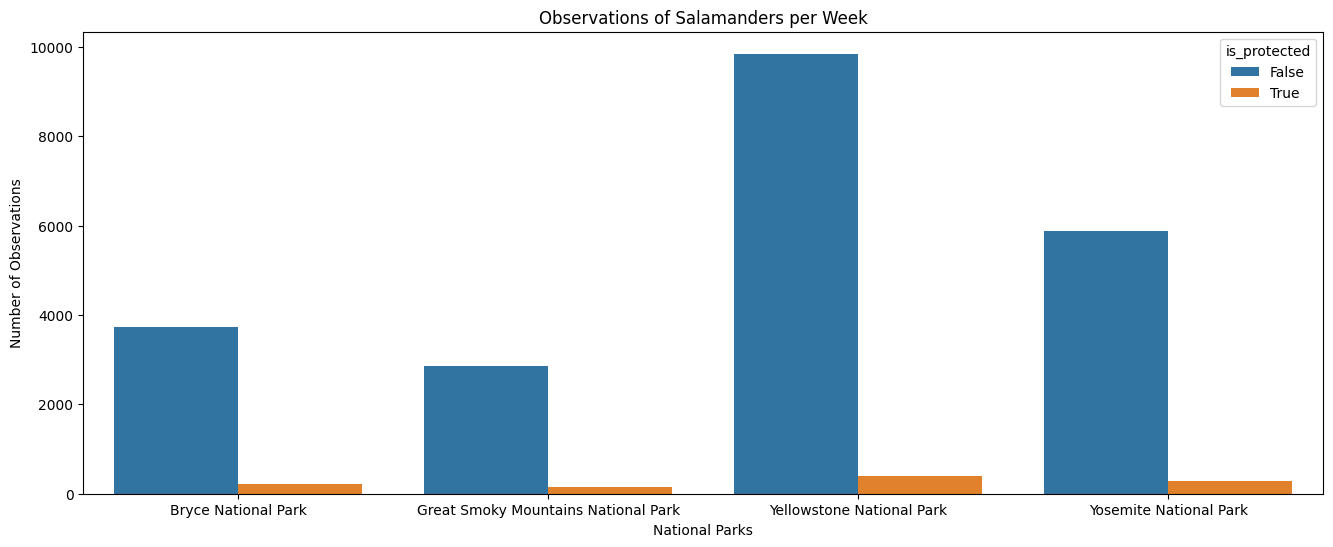

<Figure size 640x480 with 0 Axes>

In [295]:
# Plot this data to create visual demonstration (comparative bar graph):
plt.figure(figsize=(16,6))
sns.barplot(x=obs_bypark_sal.park_name, y=obs_bypark_sal.observations, hue=obs_bypark_sal.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Salamanders per Week')
plt.show()
plt.clf()

### <center>Birds<center> ###

In this sub-section, we create one list of unique birds. We then break down the distribution of warblers by their 'protected' or 'unprotected' status depending on the national park. 

In [296]:
# Perform remove_punctuation function:
common_names_birds = species[species.category == 'Bird']\
                .common_names\
                .apply(remove_punctuation)\
                .str.split().tolist()

common_names_birds[:6]

[['Brewsters', 'Warbler'],
 ['Coopers', 'Hawk'],
 ['Northern', 'Goshawk'],
 ['SharpShinned', 'Hawk'],
 ['Golden', 'Eagle'],
 ['RedTailed', 'Hawk']]

In [297]:
# Remove duplicated items from list of birds:
cleanRows_birds = []

for item in common_names_birds:
    item = list(dict.fromkeys(item))
    cleanRows_birds.append(item)

cleanRows_amphibians[:6]

[['Eastern', 'American', 'Toad'],
 ['Fowlers', 'Toad', 'Woodhouses'],
 ['Northern', 'Cricket', 'Frog'],
 ['Copes', 'Gray', 'Treefrog'],
 ['Gray', 'Treefrog'],
 ['Mountain', 'Chorus', 'Frog']]

In [298]:
# Make one list from all created values:
list_birds = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows_birds))
list_birds[:6]

['Brewsters', 'Warbler', 'Coopers', 'Hawk', 'Northern', 'Goshawk']

In [299]:
# Count the number of occurrences for each of the bird names:
wordsCounted_birds = []

for i in list_birds:
    x = list_birds.count(i)
    wordsCounted_birds.append((i,x))

bird_count = pd.DataFrame(set(wordsCounted_birds), columns = ['Word', 'Count']).sort_values('Count', ascending=False)
bird_count[:10]

,Word,Count
301,Warbler,59
238,Sparrow,29
44,American,21
428,Northern,20
403,Flycatcher,18
432,Owl,18
437,Common,18
68,Western,12
229,Woodpecker,12
217,Sandpiper,11


### Warblers ###

In [300]:
# There are several types of 'warblers', so we first want to determine which species refer to 'warblers':
# Create colunmn of booleans to check if 'is_war' is True:
species['is_war'] = species.common_names.str.contains(r'\bWarbler\b', regex=True)

# Check column in 'species' dataset to make sure it worked:
species.head(5)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sal,is_war
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False,False,False


In [301]:
# Count values where 'is_war' is True:
species[species.is_war].head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sal,is_war
90,Bird,Vermivora pinus X chrysoptera,Brewster's Warbler,No Intervention,False,False,False,True
247,Bird,Dendroica caerulescens,Black-Throated Blue Warbler,No Intervention,False,False,False,True
248,Bird,Dendroica castanea,Bay-Breasted Warbler,No Intervention,False,False,False,True
249,Bird,Dendroica cerulea,Cerulean Warbler,No Intervention,False,False,False,True
250,Bird,Dendroica coronata,Yellow-Rumped Warbler,No Intervention,False,False,False,True
251,Bird,Dendroica discolor,Prairie Warbler,No Intervention,False,False,False,True
252,Bird,Dendroica dominica,Yellow-Throated Warbler,No Intervention,False,False,False,True
253,Bird,Dendroica fusca,Blackburnian Warbler,No Intervention,False,False,False,True
254,Bird,Dendroica magnolia,Magnolia Warbler,No Intervention,False,False,False,True
255,Bird,Dendroica palmarum,Palm Warbler,No Intervention,False,False,False,True


In [302]:
# Merge results with 'observations' dataset to make a new DataFrame:
war_observations = observations.merge(species[species.is_war])

# Ensure it worked:
war_observations[:6]

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat,is_sal,is_war
0,Vermivora celata,Yosemite National Park,106,Bird,Orange-Crowned Warbler,No Intervention,False,False,False,True
1,Setophaga dominica,Yosemite National Park,140,Bird,Yellow-Throated Warbler,No Intervention,False,False,False,True
2,Helmitheros vermivorus,Yellowstone National Park,291,Bird,Worm-Eating Warbler,No Intervention,False,False,False,True
3,Limnothlypis swainsonii,Great Smoky Mountains National Park,56,Bird,Swainson's Warbler,No Intervention,False,False,False,True
4,Oreothlypis peregrina,Yellowstone National Park,250,Bird,Tennessee Warbler,No Intervention,False,False,False,True
5,Dendroica petechia,Bryce National Park,75,Bird,Yellow Warbler,No Intervention,False,False,False,True


In [303]:
# Check total warbler observations in each national park over previous 7 days:
war_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,5760
1,Great Smoky Mountains National Park,4435
2,Yellowstone National Park,14487
3,Yosemite National Park,8712


In [304]:
# Check which observations were protected and unprotected by park:
obs_bypark_war = war_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_bypark_war

,park_name,is_protected,observations
0,Bryce National Park,False,5565
1,Bryce National Park,True,195
2,Great Smoky Mountains National Park,False,4290
3,Great Smoky Mountains National Park,True,145
4,Yellowstone National Park,False,13995
5,Yellowstone National Park,True,492
6,Yosemite National Park,False,8441
7,Yosemite National Park,True,271


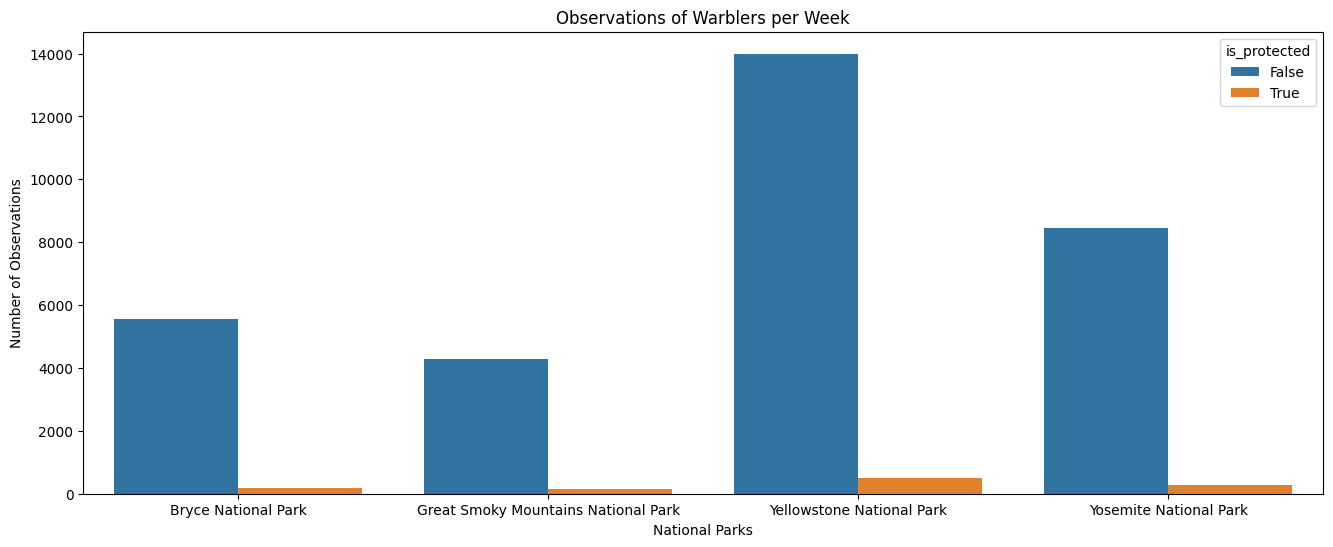

<Figure size 640x480 with 0 Axes>

In [305]:
# Plot this data to create visual demonstration (comparative bar graph):
plt.figure(figsize=(16,6))
sns.barplot(x=obs_bypark_war.park_name, y=obs_bypark_war.observations, hue=obs_bypark_war.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Warblers per Week')
plt.show()
plt.clf()

### <center>Fish<center> ###

In this sub-section, we create one list of unique fish. We then break down the distribution of shiners by their 'protected' or 'unprotected' status depending on the national park. 

In [306]:
# Perform remove_punctuation function:
common_names_fish = species[species.category == 'Fish']\
                .common_names\
                .apply(remove_punctuation)\
                .str.split().tolist()

common_names_fish[:6]

[['Brook', 'Silverside'],
 ['Gizzard', 'Shad'],
 ['White', 'Sucker'],
 ['Northern', 'Hog', 'Sucker'],
 ['River', 'Redhorse'],
 ['Black', 'Redhorse']]

In [307]:
# Remove duplicated items from list of birds:
cleanRows_fish = []

for item in common_names_fish:
    item = list(dict.fromkeys(item))
    cleanRows_fish.append(item)

cleanRows_fish[:6]

[['Brook', 'Silverside'],
 ['Gizzard', 'Shad'],
 ['White', 'Sucker'],
 ['Northern', 'Hog', 'Sucker'],
 ['River', 'Redhorse'],
 ['Black', 'Redhorse']]

In [308]:
# Make one list from all created values:
list_fish = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows_fish))
list_fish[:6]

['Brook', 'Silverside', 'Gizzard', 'Shad', 'White', 'Sucker']

In [309]:
# Count the number of occurrences for each of the fish names:
wordsCounted_fish = []

for i in list_fish:
    x = list_fish.count(i)
    wordsCounted_fish.append((i,x))

fish_count = pd.DataFrame(set(wordsCounted_fish), columns = ['Word', 'Count']).sort_values('Count', ascending = False)
fish_count[:10]

,Word,Count
98,Shiner,20
120,Darter,19
33,Trout,11
67,Sucker,7
83,Chub,7
95,Dace,7
65,Bass,5
68,Brook,5
69,Sunfish,5
26,Mountain,5


### Shiner ###

In [310]:
# There are several types of 'shiners', so we first want to determine which species refer to 'shiners':
# Create column of booleans to check if 'is_shi' is True:
species['is_shi'] = species.common_names.str.contains(r'\bShiner\b', regex=True)

# Check colum in 'species' dataset to make sure it worked:
species[:5]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sal,is_war,is_shi
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False,False,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False,False,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False,False,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,False,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False,False,False,False


In [311]:
# Count values where 'is_shi' is True:
species[species.is_shi][:10]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sal,is_war,is_shi
483,Fish,Cyprinella galactura,Whitetail Shiner,No Intervention,False,False,False,False,True
484,Fish,Cyprinella galacturus,Whitetail Shiner,No Intervention,False,False,False,False,True
485,Fish,Cyprinella spiloptera,Spotfin Shiner,No Intervention,False,False,False,False,True
486,Fish,Cyprinella spilopterus,Spotfin Shiner,No Intervention,False,False,False,False,True
487,Fish,Cyprinella venusta,Blacktail Shiner,No Intervention,False,False,False,False,True
488,Fish,Cyprinella venustus,Blacktail Shiner,No Intervention,False,False,False,False,True
493,Fish,Luxilus chrysocephalus,Striped Shiner,No Intervention,False,False,False,False,True
494,Fish,Luxilus coccogenis,Warpaint Shiner,No Intervention,False,False,False,False,True
495,Fish,Luxilus cornutus,Common Shiner,No Intervention,False,False,False,False,True
496,Fish,Lythrurus lirus,Mountain Shiner,No Intervention,False,False,False,False,True


In [312]:
# Merge results with 'observations' dataset to make new DataFrame:
shi_observations = observations.merge(species[species.is_shi])

# Ensure it worked:
shi_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat,is_sal,is_war,is_shi
0,Richardsonius balteatus,Yosemite National Park,163,Fish,Redside Shiner,No Intervention,False,False,False,False,True
1,Notropis volucellus,Bryce National Park,69,Fish,Mimic Shiner,No Intervention,False,False,False,False,True
2,Luxilus chrysocephalus,Great Smoky Mountains National Park,55,Fish,Striped Shiner,No Intervention,False,False,False,False,True
3,Notropis photogenis,Yellowstone National Park,294,Fish,Silver Shiner,No Intervention,False,False,False,False,True
4,Notropis rubricroceus,Great Smoky Mountains National Park,131,Fish,Saffron Shiner,No Intervention,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
75,Cyprinella galactura,Yellowstone National Park,232,Fish,Whitetail Shiner,No Intervention,False,False,False,False,True
76,Luxilus coccogenis,Yosemite National Park,176,Fish,Warpaint Shiner,No Intervention,False,False,False,False,True
77,Cyprinella spilopterus,Great Smoky Mountains National Park,78,Fish,Spotfin Shiner,No Intervention,False,False,False,False,True
78,Notropis photogenis,Bryce National Park,154,Fish,Silver Shiner,No Intervention,False,False,False,False,True


In [313]:
# Check total shiner observations in each national park over previous 7 days:
shi_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,2177
1,Great Smoky Mountains National Park,1578
2,Yellowstone National Park,4750
3,Yosemite National Park,2968


In [314]:
# Check which observations were protected and unprotected, by park:
obs_bypark_shi = shi_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_bypark_shi

,park_name,is_protected,observations
0,Bryce National Park,False,2177
1,Great Smoky Mountains National Park,False,1578
2,Yellowstone National Park,False,4750
3,Yosemite National Park,False,2968


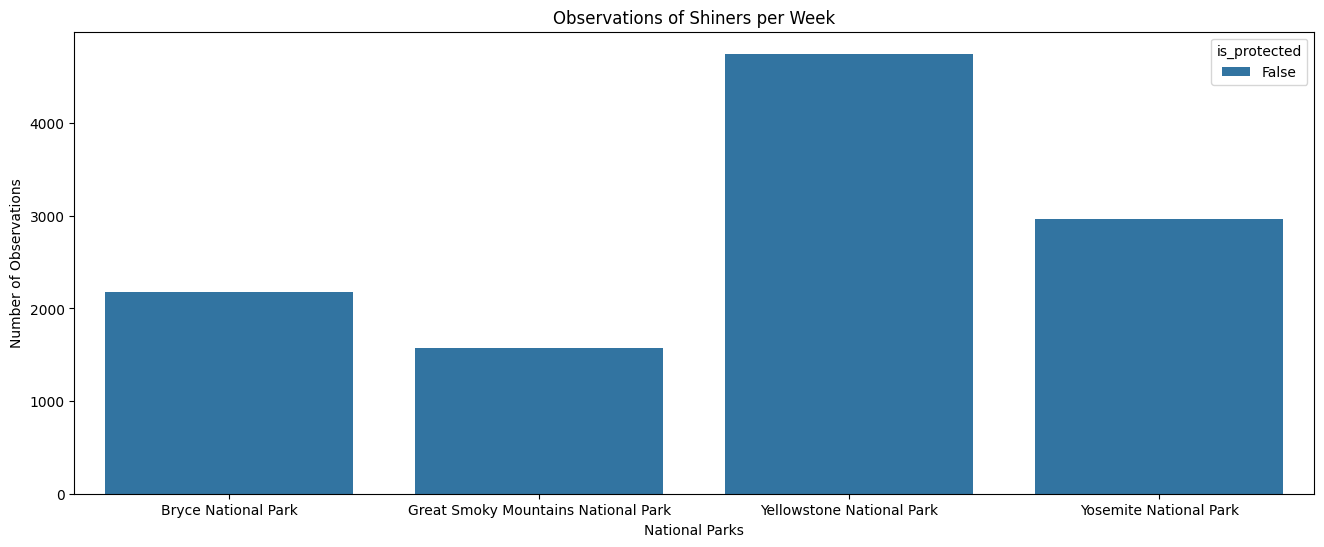

<Figure size 640x480 with 0 Axes>

In [315]:
# Even though no species are listed as protected, a graph will still be generated:
# Plot this data to create visual demonstration (comparative bar graph):
plt.figure(figsize=(16, 6))
sns.barplot(x=obs_bypark_shi.park_name, y=obs_bypark_shi.observations, hue=obs_bypark_shi.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Shiners per Week')
plt.show()
plt.clf()

### <center>Nonvascular Plants<center> ###

In this sub-section, we create one list of unique nonvascular plants. We then break down the distribution of moss by their 'protected' or 'unprotected' status depending on the national park. 

In [316]:
# Perform remove_punctuation function:
common_names_nplants = species[species.category == 'Nonvascular Plant']\
                .common_names\
                .apply(remove_punctuation)\
                .str.split().tolist()

common_names_nplants[:6]

[['Roths', 'Andreaea', 'Moss'],
 ['Andreaea', 'Moss'],
 ['Bartramia', 'Moss'],
 ['Philonotis', 'Moss'],
 ['Philonotis', 'Moss'],
 ['Philonotis', 'Moss']]

In [317]:
# Remove duplicated items from list of mammals:
cleanRows_nplants = []

for item in common_names_nplants: 
    item = list(dict.fromkeys(item))
    cleanRows_nplants.append(item)

cleanRows_nplants[:6]

[['Roths', 'Andreaea', 'Moss'],
 ['Andreaea', 'Moss'],
 ['Bartramia', 'Moss'],
 ['Philonotis', 'Moss'],
 ['Philonotis', 'Moss'],
 ['Philonotis', 'Moss']]

In [318]:
# Make one list from all created values:
list_nplants = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows_nplants))
list_nplants[:6]

['Roths', 'Andreaea', 'Moss', 'Andreaea', 'Moss', 'Bartramia']

In [319]:
# Count the number of occurrences of each of the nonvascular plant names:
wordsCounted_nplants = []

for i in list_nplants:
    x = list_nplants.count(i)
    wordsCounted_nplants.append((i,x))

nplant_count = pd.DataFrame(set(wordsCounted_nplants), columns = ['Word', 'Count']).sort_values('Count', ascending=False)
nplant_count[:10]

,Word,Count
266,Moss,280
132,Sphagnum,13
35,Dicranum,9
16,Bryum,8
102,Hypnum,8
246,Brachythecium,8
157,Pohlia,7
109,Fissidens,7
54,Polytrichum,7
83,Fontinalis,6


### Moss ###

In [320]:
# There are several types of 'moss', so we want to determine which species refer to 'moss':
# Create column of booleans to check if 'is_mos' is True:
species['is_mos'] = species.common_names.str.contains(r'\bMoss\b', regex=True)

# Check column in 'species' dataset to make sure it worked:
species[:5]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sal,is_war,is_shi,is_mos
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False,False,False,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False,False,False,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False,False,False,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,False,False,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False,False,False,False,False


In [321]:
# Count values where 'is_mos' is True:
species[species.is_mos][:10]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sal,is_war,is_shi,is_mos
1289,Vascular Plant,Phlox subulata,Moss Phlox,No Intervention,False,False,False,False,False,True
1749,Vascular Plant,Huperzia lucidula,"Shining Clubmoss, Shining Club-Moss",No Intervention,False,False,False,False,False,True
2609,Vascular Plant,Sedum acre,"Gold-Moss, Mossy Stonecrop",No Intervention,False,False,False,False,False,True
2643,Vascular Plant,Selaginella apoda,Meadow Spike-Moss,No Intervention,False,False,False,False,False,True
2679,Nonvascular Plant,Andreaea rothii,Roth's Andreaea Moss,No Intervention,False,False,False,False,False,True
2680,Nonvascular Plant,Andreaea rupestris,Andreaea Moss,No Intervention,False,False,False,False,False,True
2681,Nonvascular Plant,Bartramia pomiformis,Bartramia Moss,No Intervention,False,False,False,False,False,True
2682,Nonvascular Plant,Philonotis fontana,Philonotis Moss,No Intervention,False,False,False,False,False,True
2683,Nonvascular Plant,Philonotis fontana var. pumila,Philonotis Moss,No Intervention,False,False,False,False,False,True
2684,Nonvascular Plant,Philonotis longiseta,Philonotis Moss,No Intervention,False,False,False,False,False,True


In [322]:
# Merge results with 'observations' dataset to make new DataFrame:
mos_observations = observations.merge(species[species.is_mos])

# Ensure it worked:
mos_observations[:6]

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat,is_sal,is_war,is_shi,is_mos
0,Diphyscium cumberlandianum,Yellowstone National Park,250,Nonvascular Plant,Cumberland Diphyscium Moss,No Intervention,False,False,False,False,False,True
1,Fabronia ciliaris,Great Smoky Mountains National Park,72,Nonvascular Plant,Fabronia Moss,No Intervention,False,False,False,False,False,True
2,Ptilium crista-castrensis,Bryce National Park,109,Nonvascular Plant,Knights Plume Moss,No Intervention,False,False,False,False,False,True
3,Didymodon fallax var. reflexus,Yellowstone National Park,208,Nonvascular Plant,Didymodon Moss,No Intervention,False,False,False,False,False,True
4,Orthotrichum stellatum,Great Smoky Mountains National Park,71,Nonvascular Plant,Stellate Orthotrichum Moss,No Intervention,False,False,False,False,False,True
5,Atrichum oerstedianum,Great Smoky Mountains National Park,74,Nonvascular Plant,Oersted's Atrichum Moss,No Intervention,False,False,False,False,False,True


In [323]:
# Check total moss observations in each national park over previous 7 days:
mos_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,28960
1,Great Smoky Mountains National Park,21638
2,Yellowstone National Park,72783
3,Yosemite National Park,43662


In [324]:
# Check which observations were protected and unprotected, by park:
obs_bypark_mos = mos_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_bypark_mos

,park_name,is_protected,observations
0,Bryce National Park,False,28690
1,Bryce National Park,True,270
2,Great Smoky Mountains National Park,False,21464
3,Great Smoky Mountains National Park,True,174
4,Yellowstone National Park,False,72104
5,Yellowstone National Park,True,679
6,Yosemite National Park,False,43248
7,Yosemite National Park,True,414


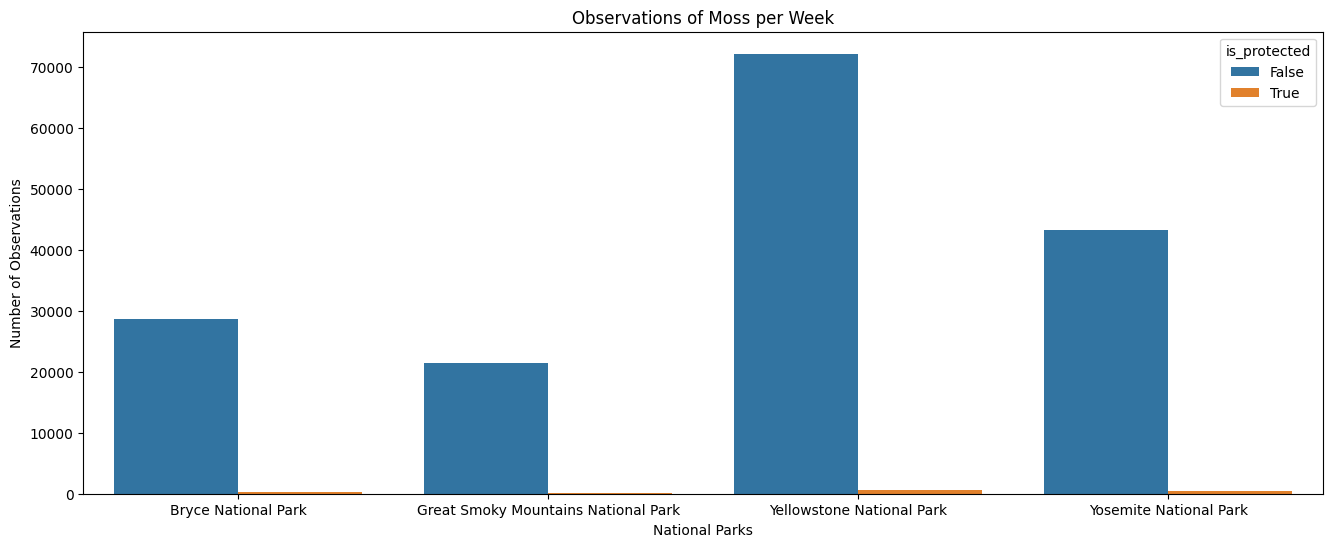

<Figure size 640x480 with 0 Axes>

In [325]:
# Plot this data to create visual demonstration (comparative bar graph):

plt.figure(figsize=(16,6))
sns.barplot(x=obs_bypark_mos.park_name, y=obs_bypark_mos.observations, hue=obs_bypark_mos.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Moss per Week')
plt.show()
plt.clf()

### <center>Reptiles<center> ###

In this sub-section, we create one list of unique reptiles. We then break down the distribution of snakes by their 'protected' or 'unprotected' status depending on the national park. 

In [326]:
# Perform remove_punctuation function:
common_names_reptiles = species[species.category == 'Reptile']\
                .common_names\
                .apply(remove_punctuation)\
                .str.split().tolist()

common_names_reptiles[:6]

[['Eastern', 'Slender', 'Glass', 'Lizard'],
 ['Worm', 'Snakes', 'Wormsnakes'],
 ['Eastern', 'Worm', 'Snake'],
 ['Midwest', 'Worm', 'Snake'],
 ['Northern', 'Scarlet', 'Snake'],
 ['Northern', 'Black', 'Racer']]

In [327]:
# Remove duplicated items from list of reptiles:
cleanRows_reptiles = []

for item in common_names_reptiles:
    item = list(dict.fromkeys(item))
    cleanRows_reptiles.append(item)

cleanRows_reptiles[:6]

[['Eastern', 'Slender', 'Glass', 'Lizard'],
 ['Worm', 'Snakes', 'Wormsnakes'],
 ['Eastern', 'Worm', 'Snake'],
 ['Midwest', 'Worm', 'Snake'],
 ['Northern', 'Scarlet', 'Snake'],
 ['Northern', 'Black', 'Racer']]

In [328]:
# Make one list from all created values:
list_reptiles = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows_reptiles))
list_reptiles[:6]

['Eastern', 'Slender', 'Glass', 'Lizard', 'Worm', 'Snakes']

In [329]:
# Count the number of occurrences of each of the reptile names:
wordsCount_rep = []

for i in list_reptiles:
    x = list_reptiles.count(i)
    wordsCount_rep.append((i, x))

rep_count = pd.DataFrame(set(wordsCount_rep), columns = ['Word', 'Count']).sort_values('Count', ascending = False)
rep_count[:10]

,Word,Count
67,Snake,27
86,Northern,15
1,Eastern,11
54,Turtle,11
17,Lizard,9
59,Skink,7
12,Kingsnake,6
56,Western,5
45,Garter,5
22,Racer,4


### Snakes ###

In [330]:
# There are several types of 'snakes', so we first want to determine which species refer to 'snakes':
# Create column of booleans to check if 'is_sna' is True:
species['is_sna'] = species.common_names.str.contains(r'\bSnake\b', regex=True)
species[:5]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sal,is_war,is_shi,is_mos,is_sna
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False,False,False,False,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False,False,False,False,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False,False,False,False,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,False,False,False,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False,False,False,False,False,False


In [331]:
# Count values where 'is_sna' is True:
species[species.is_sna][:10]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sal,is_war,is_shi,is_mos,is_sna
363,Reptile,Carphophis amoenus amoenus,Eastern Worm Snake,No Intervention,False,False,False,False,False,False,True
364,Reptile,Carphophis amoenus helenae,Midwest Worm Snake,No Intervention,False,False,False,False,False,False,True
365,Reptile,Cemophora coccinea copei,Northern Scarlet Snake,No Intervention,False,False,False,False,False,False,True
367,Reptile,Diadophis punctatus edwardsii,Northern Ringneck Snake,No Intervention,False,False,False,False,False,False,True
368,Reptile,Elaphe guttata guttata,Corn Snake,No Intervention,False,False,False,False,False,False,True
369,Reptile,Elaphe obsoleta obsoleta,Black Rat Snake,No Intervention,False,False,False,False,False,False,True
370,Reptile,Heterodon platirhinos,Eastern Hognose Snake,No Intervention,False,False,False,False,False,False,True
376,Reptile,Lampropeltis triangulum triangulum,Eastern Milk Snake,No Intervention,False,False,False,False,False,False,True
377,Reptile,Nerodia erythrogaster,Plainbelly Water Snake,No Intervention,False,False,False,False,False,False,True
378,Reptile,Nerodia erythrogaster flavigaster,"Yellowbelly Water Snake, Yellowbelly Watersnake",No Intervention,False,False,False,False,False,False,True


In [332]:
# Merge results with 'observations' dataset to make a new DataFrame:
sna_observations = observations.merge(species[species.is_sna])

# Ensure that it worked:
sna_observations[:6]

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat,is_sal,is_war,is_shi,is_mos,is_sna
0,Thamnophis sirtalis sirtalis,Great Smoky Mountains National Park,63,Reptile,Common Garter Snake,No Intervention,False,False,False,False,False,False,True
1,Opheodrys aestivus aestivus,Yosemite National Park,161,Reptile,Eastern Rough Green Snake,No Intervention,False,False,False,False,False,False,True
2,Thamnophis elegans vagrans,Bryce National Park,107,Reptile,Wandering Garter Snake,No Intervention,False,False,False,False,False,False,True
3,Sanicula marilandica,Great Smoky Mountains National Park,117,Vascular Plant,"Black Snakeroot, Black Snake-Root",No Intervention,False,False,False,False,False,False,True
4,Carphophis amoenus helenae,Yellowstone National Park,214,Reptile,Midwest Worm Snake,No Intervention,False,False,False,False,False,False,True
5,Pituophis melanoleucus melanoleucus,Yellowstone National Park,191,Reptile,Northern Pine Snake,Species of Concern,True,False,False,False,False,False,True


In [333]:
# Check total snake observations in each national park over the previous 7 days:
sna_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3344
1,Great Smoky Mountains National Park,2374
2,Yellowstone National Park,8149
3,Yosemite National Park,4823


In [4]:
# Check which observations were protected and unprotected by park:
obs_bypark_sna = sna_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_bypark_sna

NameError: name 'sna_observations' is not defined

In [5]:
# Plot this data to create visual demonstration (comparative bar graph):
plt.figure(figsize=(16,6))
sns.boxplot(x=obs_bypark_sna.park_name, y=obs_bypark_sna.observations, hue=obs_bypark_sna.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Snakes per Week')
plt.show()
plt.clf()

NameError: name 'obs_bypark_sna' is not defined

<Figure size 1600x600 with 0 Axes>

### <center>Vascular Plants<center> ###

In this sub-section, we create one list of unique vascular plants. We then break down the distribution of sedges by their 'protected' or 'unprotected' status depending on the national park. 

In [336]:
# Perform remove_punctuation function:
common_names_vplants = species[species.category == 'Vascular Plant']\
                .common_names\
                .apply(remove_punctuation)\
                .str.split().tolist()

common_names_vplants[:6]

[['Sweetflag'],
 ['WaterPlantain'],
 ['Longbeak', 'Arrowhead'],
 ['BroadLeaved', 'Arrowhead'],
 ['Green', 'Dragon'],
 ['Jack', 'In', 'The', 'Pulpit']]

In [337]:
# Remove duplicated items from list of vascular plants:
cleanRows_vplants = []

for item in common_names_vplants:
    item = list(dict.fromkeys(item))
    cleanRows_vplants.append(item)

cleanRows_vplants[:6]

[['Sweetflag'],
 ['WaterPlantain'],
 ['Longbeak', 'Arrowhead'],
 ['BroadLeaved', 'Arrowhead'],
 ['Green', 'Dragon'],
 ['Jack', 'In', 'The', 'Pulpit']]

In [338]:
# Make one list from all created values
list_vplants = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows_vplants))
list_vplants[:6]

['Sweetflag',
 'WaterPlantain',
 'Longbeak',
 'Arrowhead',
 'BroadLeaved',
 'Arrowhead']

In [339]:
# Count the number of occurrences of each of the vascular plant names:
wordsCounted_vplants = []

for i in list_vplants:
    x = list_vplants.count(i)
    wordsCounted_vplants.append((i,x))

vplant_count = pd.DataFrame(set(wordsCounted_vplants), columns = ['Word', 'Count']).sort_values('Count', ascending = False)
vplant_count[:6]

,Word,Count
2011,Sedge,226
1953,Common,153
3043,Grass,134
841,Mountain,124
1824,White,92
987,Wild,84


### Sedges ###

In [340]:
# There are several types of 'sedges', so we first want to determine which species refer to 'sedges':
# Create column of booleans to check if 'is_sed' is True:
species['is_sed'] = species.common_names.str.contains(r'\bSedge\b', regex=True)

# Check column in 'species' dataset to make sure it worked:
species[:5]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sal,is_war,is_shi,is_mos,is_sna,is_sed
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False,False,False,False,False,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False,False,False,False,False,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False,False,False,False,False,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,False,False,False,False,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False,False,False,False,False,False,False


In [341]:
# Count values where 'is_sed' is True:
species[species.is_sed][:10]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sal,is_war,is_shi,is_mos,is_sna,is_sed
296,Bird,Cistothorus platensis,Sedge Wren,No Intervention,False,False,False,False,False,False,False,True
1946,Vascular Plant,Bulbostylis capillaris,"Bulbostylis, Dense-Tuft Hair-Sedge",No Intervention,False,False,False,False,False,False,False,True
1947,Vascular Plant,Carex,"Carex, Sedge, Sedge Species, Sedges",No Intervention,False,False,False,False,False,False,False,True
1948,Vascular Plant,Carex abscondita,Thicket Sedge,No Intervention,False,False,False,False,False,False,False,True
1949,Vascular Plant,Carex aestivalis,Summer Sedge,No Intervention,False,False,False,False,False,False,False,True
1950,Vascular Plant,Carex aggregata,Glomerate Sedge,No Intervention,False,False,False,False,False,False,False,True
1951,Vascular Plant,Carex albicans,Whitetinge Sedge,No Intervention,False,False,False,False,False,False,False,True
1952,Vascular Plant,Carex albicans var. albicans,Sedge,No Intervention,False,False,False,False,False,False,False,True
1953,Vascular Plant,Carex albicans var. australis,Sedge,No Intervention,False,False,False,False,False,False,False,True
1954,Vascular Plant,Carex albicans var. emmonsii,"Emmons Sedge, Sedge",No Intervention,False,False,False,False,False,False,False,True


In [342]:
# Merge results with 'observations' dataset to make new DataFrame:
sed_observations = observations.merge(species[species.is_sed])

# Ensure that it worked: 
sed_observations[:6]

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat,is_sal,is_war,is_shi,is_mos,is_sna,is_sed
0,Cistothorus platensis,Bryce National Park,114,Bird,Sedge Wren,No Intervention,False,False,False,False,False,False,False,True
1,Carex backii,Great Smoky Mountains National Park,58,Vascular Plant,"Back's Sedge, Rocky Mountain Sedge",No Intervention,False,False,False,False,False,False,False,True
2,Carex lenticularis var. lipocarpa,Bryce National Park,112,Vascular Plant,"Kellogg Sedge, Kellogg's Sedge",No Intervention,False,False,False,False,False,False,False,True
3,Carex preslii,Great Smoky Mountains National Park,25,Vascular Plant,Presl's Sedge,No Intervention,False,False,False,False,False,False,False,True
4,Carex jamesii,Great Smoky Mountains National Park,117,Vascular Plant,"James? Sedge, Nebraska Sedge",No Intervention,False,False,False,False,False,False,False,True
5,Carex gracillima,Yellowstone National Park,240,Vascular Plant,Graceful Sedge,No Intervention,False,False,False,False,False,False,False,True


In [343]:
# Check total salamander observations in each national park over previous 7 days:
sed_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,24171
1,Great Smoky Mountains National Park,18356
2,Yellowstone National Park,60375
3,Yosemite National Park,37160


In [344]:
obs_bypark_sed = sed_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_bypark_sed

,park_name,is_protected,observations
0,Bryce National Park,False,24090
1,Bryce National Park,True,81
2,Great Smoky Mountains National Park,False,18267
3,Great Smoky Mountains National Park,True,89
4,Yellowstone National Park,False,60151
5,Yellowstone National Park,True,224
6,Yosemite National Park,False,36997
7,Yosemite National Park,True,163


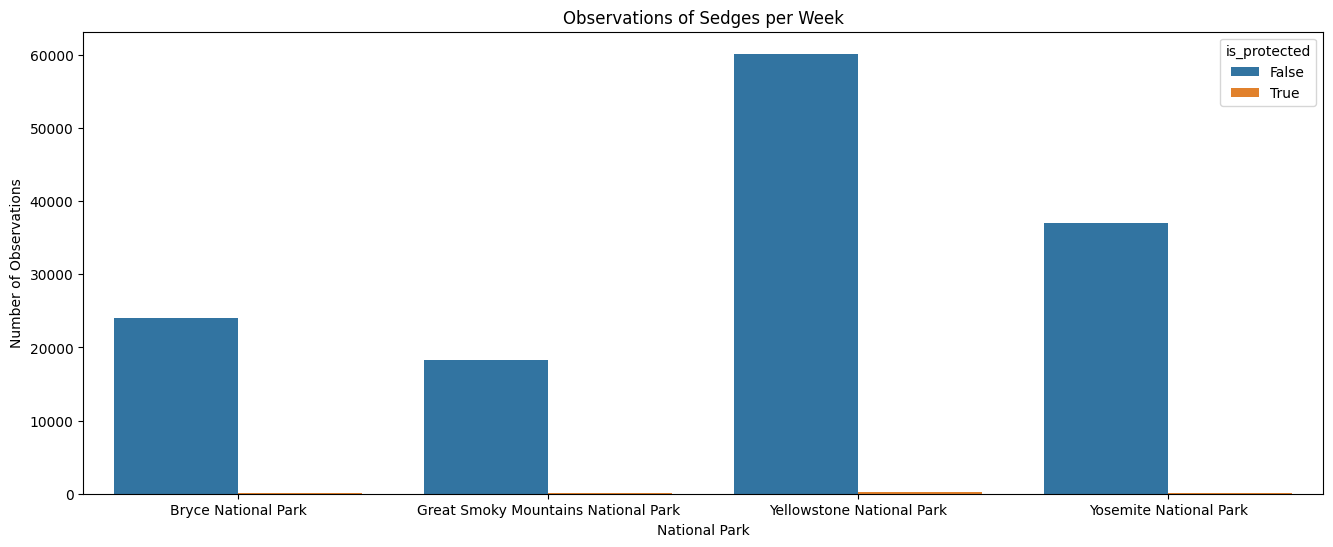

<Figure size 640x480 with 0 Axes>

In [345]:
# Plot this data to create visual demonstration (comparative bar graph):
plt.figure(figsize=(16,6))
sns.barplot(x=obs_bypark_sed.park_name, y=obs_bypark_sed.observations, hue=obs_bypark_sed.is_protected)
plt.xlabel('National Park')
plt.ylabel('Number of Observations')
plt.title('Observations of Sedges per Week')
plt.show()
plt.clf()

## <center>Conclusions<center> ##

By analyzing data on observations of different species in national parks, we were able to make a number of conclusions based on the results of the assessment. The research questions presented at the beginning of the project were all able to be answered in specific detail.

#### 1. What is the distribution of conservation status for species? ####

    Most species were, by and large, not part of a conservation status. The number of non-conservation status species were 5,633, whereas
    the nubmer of conserved species was 191. The total number of observations was 3,314,739.
   
#### 2. Are certain types of species more likely to be endangered? ####

    Mammals and birds had the highest percentage of species being under a conservation status, with the breakdown being as follows:
 
           * Amphibians:         8.86%
           * Birds:              15.37%
           * Fish:               8.73%
           * Mammals:            17.05%
           * Nonvascular Plants: 1.50%
           * Reptiles:           6.41%
           * Vascular Plant:     1.08%
   
#### 3. Are the differences between species and their conservation status significant? ####

    The only significance that was illustrated occurred in the case of Mammals and Reptiles, which was shown to have a statistical
    significant difference. All other species did not meet the required threshold, although fish and mammals as well as birds and fish
    were quite close to the designated p-value of 0.05.

#### 4. Which animal is most prevalent and what is their distribution among parks? ####

    While bats were the most frequently observed species of all, the most commonly observed species for each category is as follows:


           * Amphibians:         Salamander
           * Birds:              Warbler
           * Fish:               Shiner
           * Mammals:            Bat
           * Nonvascular Plants: Moss
           * Reptiles:           Snake
           * Vascular Plant:     Sedge
       